<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/16x32x64x128x256_TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [7]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [9]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
32/32 [==============================] - 426s 13s/step - loss: 2.0539 - accuracy: 0.3438 - val_loss: 0.9066 - val_accuracy: 0.6354
Epoch 2/50
32/32 [==============================] - 44s 1s/step - loss: 0.9768 - accuracy: 0.5625 - val_loss: 0.7657 - val_accuracy: 0.6979
Epoch 3/50
32/32 [==============================] - 46s 1s/step - loss: 0.8592 - accuracy: 0.6953 - val_loss: 0.7280 - val_accuracy: 0.7104
Epoch 4/50
32/32 [==============================] - 38s 1s/step - loss: 0.4817 - accuracy: 0.8203 - val_loss: 1.0793 - val_accuracy: 0.7365
Epoch 5/50
32/32 [==============================] - 37s 1s/step - loss: 0.7274 - accuracy: 0.8125 - val_loss: 0.6934 - val_accuracy: 0.7458
Epoch 6/50
32/32 [==============================] - 39s 1s/step - loss: 0.6099 - accuracy: 0.7188 - val_loss: 0.5881 - val_accuracy: 0.7885
Epoch 7/50
32/32 [==============================] - 40s 1s/step - loss: 0.6186 - accuracy: 0.7812 - val_loss: 0.5385 - val_accuracy: 0.8083
Epoch 8/50
32/32 [

In [11]:
test_predictions = model.predict(test_dataset)
test_predictions

240/240 [==============================] - 369s 2s/step


array([[7.13969648e-01, 1.32602616e-03, 1.17114280e-06, 2.84703106e-01],
       [8.93193111e-02, 2.04582029e-05, 5.16155541e-01, 3.94504756e-01],
       [9.65334693e-05, 9.99900699e-01, 2.68756799e-06, 1.12239285e-08],
       ...,
       [9.99947906e-01, 1.85628593e-07, 4.22206140e-05, 9.59377303e-06],
       [7.63858610e-04, 7.65914228e-05, 8.46613431e-04, 9.98312950e-01],
       [2.16238230e-04, 3.21345681e-07, 9.99584258e-01, 1.99192975e-04]],
      dtype=float32)

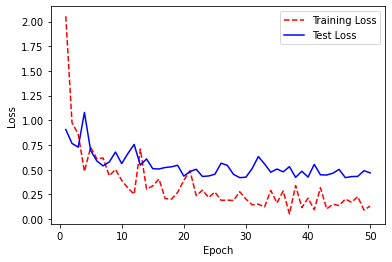

In [12]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

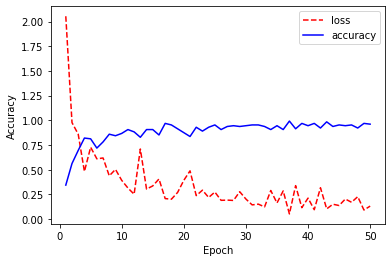

In [13]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();